# Titulo del Proyecto:

# "Desarrollo de un modelo de clasificación de poses bioactivas con aplicación en campañas de screening virtual de fármacos antichagásicos"


# 1. Contexto del Proyecto

## 1.1. Motivación
Mi nombre es Alfredo Quevedo, soy profesor e investigador en el área Química Medicinal, en la Universidad Nacional de Córdoba, Argentina. Mi área de trabajo reciente refiere a la química computacional, y más específicamente al desarrollo de estrategias bioinformáticas para el diseño *in silico* y cribado masivo de nuevos fármacos. En ese contexto, desde hace algunos años me encuentro desarrollando una plataforma open-source para el desarrollo de campañas de cribado virtual de fármacos, la cual he denominado [TidyScreen](https://github.com/alfredoq/TidyScreen_v2), y que se encuenta disponible
como repositorio público en GitHub.

En muy resumidas cuentas, una ***campaña de cribado virtual de fármacos*** implica el manejo de cientos de miles moléculas, incluso a veces millones, para identificar candidatos que interaccionen de manera eficiente con un receptor biológico. Una campaña de este tipo implica etapas
de:

- ***Generación de espacio químico:*** Es la etapa en la cual se preparan los sets de mo-
léculas cribar. Como se ha mencionado pueden ser desde miles, cientos de miles e incluso
millones. Una de las estrategias masivas mas utilizadas es la síntesis virtual combinatoria.
En el siguiente enlace, se puede ver un tutorial ejemplo estrechamente relacionado con el
proyecto presentado.

- ***Docking molecular:*** Es la etapa en la cual se utilizan una gran diversidad de algoritmos
y estategias para predecir/enumerar los modos de interacción de un ligando a un receptor
biológico. Típicamente cada ensayo de docking molecular arroja una gran cantidad de
poses alternativas de unión, rankeando las mismas mediante funciones de scoring que
típicamente describen de manera cuantitativa la afinidad esperada para ese ligando por
el receptor correspondiente.

- ***Cómputo de patrones de interacción:*** En esta etapa se computan los patrones
de interacción de entre el ligando y el receptor. Los estudios más exhaustivos permiten
descomponer las interacciones por resíduo de la proteína. Incluso es posible calcular tipos
de interacciones independientes para cada resíduos de la proteína. Este cómputo puede
ser cuantitativo (i.e. magnitud estimada de la interacción) o cualitativo binario (i.e. 0/1
si existe o no existe según criterios geométricos).

- ***Identificación de candidatos bioactivos:*** En esta etapa es donde el ML cobra valor
como técnica de *screening*, ya que en las etapas finales de cribado virtual típicamente se
termina con una gran cantidad de patrones de interacción que deben ser decodificados
en búsqueda del que se considera bioactivo. ***El presente proyecto de trabajo está cen-
trado en esta etapa, concerniente a desarrollar un modelo de ML que pueda ser puesto
en producción para detectar ligandos que se anclan en el sitio receptor con un patrón
específico***.

- Propuestas para trabajo experimental: Luego de identificados los candidatos, típi-
camente el grupo de química computacional propone al equipo experimental la síntesis
química de candidatos identificados como prometedores, tras lo cual se evalúan en térmi-
nos de actividad biológica.


## 1.2. Implementación de ML en TidyScreen

El objetivo general de este proyecto, consiste en desarrollar un modelo de ML que pueda ser implementado dentro del flujo de trabajo de TidyScreen a los fines de clasificar poses de unión específicas de ligandos tal como son obtenidos de estudios de docking molecular.


# 2. Descripción del dataset utilizado

## 2.1 Problema en estudio y solución propuesta

El problema biomédico en el que se centra el proyecto refiere a la enfermedad de Chagas, una parasitosis endémica en Sudamérica que constituye un problema sanitario aún no resulto. La Cruzipaína (CZP) es un blanco terapéutico validado para el desarrollo de inhibidores que tengan potencial como fármacos antichagásicos. La estructura tridimensional de CZP puede verse aquí:


![Contactos_principales_baselina](./images/Fig1.png)



En ese contexto, el desarrollo los ïnihibidores covalentes dirigidos"(TCIs, targeted covalent inhibitors, por sus siglas en inglés) constituye una de las estrategias mas prometedoras. El problema con los TCIs es que se requiere descubrir estructuras química de máxima compatibilidad con el sitio catalítico de la enzima, a los fines de lograr obtener fármacos que sean seguros y selectivos además de potentes. En la siguiente figura puede verse un TCI unido a CZP:


<img src="./images/244-Dock.png" alt="Alt text" width="400"/>


La búsqueda de tales moléculas podemos imaginarla como un problema combinatorio de molécular que requiere una gran capacidad de cómputo y análisis de datos asociados a los resultados generados.

Para construir el dataset de trabajo, fué necesario selecionar un set de moléculas ejemplo y un blanco molecular que opere como receptor biológico. Dados mis intereses de investigación, trabajé con un dos sets de entrenamiento:
- Un reporte bibliográfico de Brak et al conteniendo 20 inhibidores de CZP.<sup>[1](https://pubs.acs.org/doi/abs/10.1021/ja710254m)</sup>


- Un set reportado desde mi grupo de investigación conteniendo 130 inhibiidores de CZP.<sup>[2](https://pubs.acs.org/doi/abs/10.1021/acsmedchemlett.4c00460), [3](https://www.mdpi.com/1420-3049/29/17/4224), [4](https://pubs.acs.org/doi/abs/10.1021/acsmedchemlett.4c00631)</sup>

Con todos estos inhibidores se construyó un set de moléculas de interés, se realizaron estudios de docking molecular y se computaron patrones de intracción intermolecular empleando la librería [ProLIF](https://prolif.readthedocs.io/en/stable/). A partir de los resultados obtenidos, se visualizaron cada una de las poses de unión resultantes, asignando las etiquetas correspondientes: ***0:*** *modo de unión no bioactivo*, ***1:*** *modo de unión bioactivo*.

## 2.2 Dataset de trabajo

Conforme se fué avanzando en la construcción del dataset se fueron adicionando/filtrando modos de unión, ya sean positivos como negativos, a los fines de incluir diversidad química en la moléculas consideradas. Dicha diversidad es lo que en definitiva hará al modelo de ML generalizable para el problema en estudio. 

El [*set de datos*](./dataset/dataset.csv) utilizado para desarrollar el modelo de ML contiene un total de **604 poses de unión etiquetadas**, siendo de ellas **266 poses positivas** y **338 poses negativas**. Como un todo, el dataframe utilizado cuenta con 604 filas (i.e. fingerprints) y 3230 columnas, de las cuales 4 corresponden a datos del ligando/ensayo, 1 a la etiqueta y 3225 columnas corresponden a features de interacción. Los identificadores de las columnas son los siguientes:

- ***assay_id***: corresponde a un identificador del ensayo de docking molecular tal como se realizón en TidyScreen. Sirve para tener trazabilidad al experimento en el cual se obtuvo la pose de unión.
- ***ligname***: es un valor denominado *InChI Key* que constituye un identificador químico único derivado de la estructura química del ligando estudiado. 
- ***sub_pose***: es la sub-pose que se obtiene durante el ensayo de docking molecular. Cabe destacar que cada ligando puede originar subposes diferentes y/o alternativas.
- ***prolif_parameters_set***: es un identificador interno en TidyScreen utilizado para asignar parámetros y configuraciones específicas para el cómputo de los contactos intermoleculares empleando ProLIF.
- ***Features de interacciones***: aquí debe mencionarse que se computa la presencia (1) o ausencia (0) de 15 tipos de interacciones por cada resíduo de la proteína que es target en el ensayo de docking molecular. Entonces tendremos tantos features como ***resíduos de aminoácidos \* 15*. El nombre de cada feature es: *{RESNAME}{RESNUMBER}\_{CHAIN}\_{INTERACTION_TYPE}***. En este caso tenemos 215 resíduos, por lo el dataset incluye un total de 215 \* 15 = 3225 features de interacción.
- ***Binder***: 1 (positive binder) /  0 (negative binder)



In [1]:
## Exploración del dataset de trabajo
import pandas as pd

data = "./dataset/dataset.csv"
df = pd.read_csv(data)
print(f"Número de registros en el dataset: {len(df)}")

positives = df[df["binder"] == 1].shape[0]
negatives = df[df["binder"] == 0].shape[0]

print(f"Positive binders: {positives}")
print(f"Negative binders: {negatives}")

unique_cpds = df["ligname"].unique() # Compuestos únicos por nombre
print(f"Número de compuestos únicos en el set: {len(unique_cpds)}")



Número de registros en el dataset: 604
Positive binders: 266
Negative binders: 338
Número de compuestos únicos en el set: 131


Aquí se puede ver que se cosntruyó el dataset de modo de tener balanceadas las clases, es decir cantidades similares de poses positivas y negativas, incluyendo descripciones para cada compuesto dockeados. Se atendió ese requrimiento para favorecer la generalización del modelo desarrollado.

# 3- Desarrollo del modelo de ML

## 3.1- Selección de la calse de modelo de ML a entrenar

Teniendo en cuenta la diversidad de modelos de ML disponibles, se inició por considerar la mejor opción para el problema en estudio. En ese sentido se ***seleccionó un modelo de Random Forest** como la opción mas adecuada en base a que:

- Es adecuado para tareas de clasificación binaria como la que plantea el problema
- Provee la capacidad de informar aspectos de feature importance, es decir es interpretable. Ello es crítico para el desarrollo de fármacos basados en estructuras, porque típicamente queremos saber cuáles son los contactos que caracterizan las poses bioactivas.
- Es robusto al overfitting si se calibran bien la cantidad de áboles empleados. Ello es importante, porque no queremos sesgar la identificación de poses a un espacio química acotado.

## 3.2- Desarrollo de un modelo baseline
El modelo baseline se desarrolló utilizando todos los features del dataset y los hiperpará-
metros por default para random forests implementados en scikit-learn:

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import joblib

# Eliminar patrones de interacción que se encuentran duplicados
subset_cols = df.columns[3:]
duplicated_rows = df[df.duplicated(subset=subset_cols)]
print(f"Number of duplicated interaction fingerperints: {len(duplicated_rows)}")
df_clean = df.drop_duplicates(subset=subset_cols)
print(f"Final number of unique interaction fingerprints: {len(df_clean)}")



Number of duplicated interaction fingerperints: 4
Final number of unique interaction fingerprints: 600


Como puede verse, sólo se hallaron **4 fingreprints duplicados**, los cuaes fueron eliminados.
    
En el próximo paso se extrajeron las columnas que no son features o etiquetas. Se reservan
esos datos para posteriores análisis.

In [3]:
columns_to_drop = ["assay_id","ligname","sub_pose"]
df_strings = df_clean[columns_to_drop]
df_features = df_clean.drop(columns_to_drop, axis=1)

Se importa la función para filtrar la features según radio de cutoff (en angstroms). El **model baseline** tiene un radio de 999 angstroms tomando como centro el resíduo catalítico de Cys25, con lo cual se consiran todos los features computados por ProLIF:

In [4]:
from custom_functions import functions as functions

# Todos los features considerados a un cutoff de 999 angstroms para el modelo baseline
cutoff = 999

# Obtener el dataframe con las features filtradas según el cutoff de interacción
filtered_df = functions.filter_df_based_on_cutoff(df, cutoff)

print(f"El dataset a utilizar tiene {filtered_df.shape[0]} filas y {filtered_df.shape[1]} columnas")

El dataset a utilizar tiene 604 filas y 3229 columnas


Se separan las features que se utilizarán para entrenar de las columnas de texto que son información anexa:

In [5]:
# Se eliminand las columnas de texto con identificadores asociados a TidyScreen
columns_to_drop = ["assay_id","ligname","sub_pose"]
filtered_df_strings = filtered_df[columns_to_drop]
filtered_df_features = filtered_df.drop(columns_to_drop, axis=1)

# Se separan las features de las etiquetas
X = filtered_df_features.iloc[:, :-1]
y = filtered_df_features.iloc[:, -1]

print(f"El dataset a utilizar tiene {X.shape[0]} filas y {X.shape[1]} features")

El dataset a utilizar tiene 604 filas y 3225 features


Para avanzar en el desarollo de modelo se realiza la división del set de datos en **training set** y **test set**

In [6]:
X_train, X_test, y_train, y_test, strings_train, strings_test = train_test_split(X, y, filtered_df_strings, test_size=0.25, stratify=y, random_state=42)

Se configura el modelo de Random Forest con los hiperparámetros por defecto y se entrena el modelo. (Resulta opcional cargar un modelo ya entrenado cuando se require hacer análisis de performance)

In [7]:
train = 0

if train == 0:
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
else:
    rf = joblib.load("./models_files/random_forest_baseline.pkl")

Se pueden visualizar los hiperparámetros asignados por defecto:

In [8]:
hyperparamters = rf.get_params()
print(hyperparamters)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Se evalúa la performance del **modelo baseline** sobre el set test:

In [9]:
y_pred = rf.predict(X_test)

# Evaluate the model
print("Precision Score baseline:",round(precision_score(y_test, y_pred),4))
print("Recall Score baseline:",round(recall_score(y_test, y_pred),4))
print("Accuracy Score baseline:",round(accuracy_score(y_test, y_pred),4))
print("F1 Score baseline:",round(f1_score(y_test, y_pred),4))

Precision Score baseline: 0.9206
Recall Score baseline: 0.8788
Accuracy Score baseline: 0.9139
F1 Score baseline: 0.8992


En el caso que se el modelo resulte de interés en base a performance se lo puede grabar a una fila para posterior utilización:

In [10]:
save_model = 0

if save_model == 1:
    filename = input("Provide the model filename: ")
    joblib.dump(rf, f"./models_files/{filename}")

Observamos la matriz de confusión para el modelo baseline:

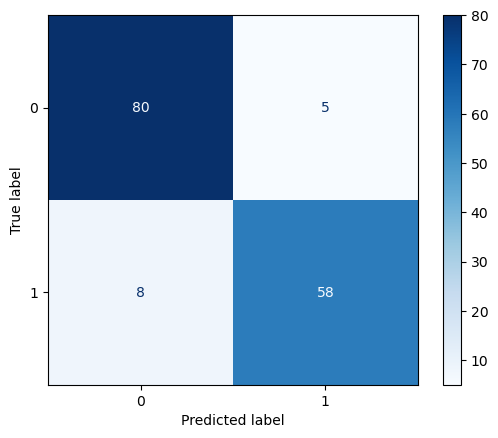

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

Y vamos a extrar los datos de feature importance que son de gran importancia para el caso de estudio porque definen cuáles son las interacciones intermolecular críticas que definen los modos positivos y negativos:

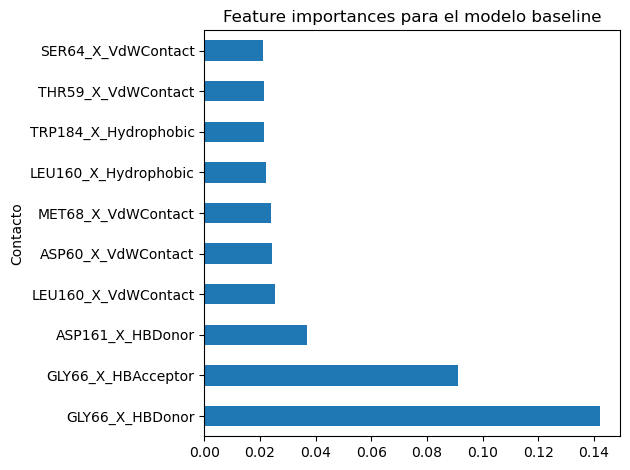

In [12]:
importances = rf.feature_importances_
forest_importance = pd.Series(importances,index=rf.feature_names_in_)

feature_numbers = 10
forest_importance_sorted = forest_importance.sort_values(ascending=False).head(feature_numbers)
fig, ax = plt.subplots()
forest_importance_sorted.plot.barh(ax=ax)
ax.set_title("Feature importances para el modelo baseline")
ax.set_ylabel("Contacto")
fig.tight_layout()

Aquí se puede ver que hay 3 features que dominan el poder predictivo del modelo:
- GLY66_X_HBDonor
- GLY_X_HBAcceptor
- ASP161_X_HBDonor

En el contexto del análisis químico, estos tres contacto responden al posicionamiento del anillo 1,2,3 triazol en la zona catalítica de la enzima. Cabe destacar que el objetivo de diseño de estos TCIs es justamente aplicar un reemplazo bioisostérico del enlace peptídico que es típico de los inhibidores clásicos. La siguiente figura muestra la significancia de estos contactos: 

![Contactos_principales_baselina](./images/contactos_farmacofóricos_baseline.png)


También resulta relevante observar que además de los tres features mencionados, el resto de interacciones tienen todos misma importancia, y siendo que ellos dependen de la diversidad química del set entrenamiento, se estima que el modelo tiene una buena capacidad de generalizar, porque no hay contactos dependientes de la diversidad química que predominen. En particular, de esta matriz de confusión, resulta muy relevante analizar los falsos positivos. Estas moléculas sería candidatos a ser explorados, mientras que su modo de unión no es bioactivo. 

Entonces se identificaron estos falsos positivos y se analizaron las 3 features mas importantes:

In [13]:
# Combinar los resultados del test con los flags del dataset original
results = strings_test.copy()
results['true_label'] = y_test
results['predicted_label'] = y_pred

In [14]:
from custom_functions import functions as functions

# Mostrar interacciones para las 3 features principales en los casos FALSOS POSITIVOS
false_positives = results[(results["true_label"] == 0) & (results["predicted_label"] == 1)]
interactions_list = ["GLY66_X_HBAcceptor", "GLY66_X_HBDonor", "ASP161_X_HBDonor"]
sub_poses_list = []
for index, row in false_positives.iterrows():
    sub_pose_name = row["sub_pose"]
    sub_poses_list.append(sub_pose_name)

subset = functions.show_subpose_interactions(filtered_df, interactions_list, sub_poses_list, true_label=0, predicted_label=1)
subset

/home/fredy/MisDocumentos/Varios/Codigo_Facilito_BootCamp_Machine_Learning_2025/notebook/custom_functions/functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subseted_df_subpose["True_label"] = true_label
/home/fredy/MisDocumentos/Varios/Codigo_Facilito_BootCamp_Machine_Learning_2025/notebook/custom_functions/functions.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subseted_df_subpose["Predicted_label"] = predicted_label


,assay_id,sub_pose,GLY66_X_HBAcceptor,GLY66_X_HBDonor,ASP161_X_HBDonor,True_label,Predicted_label
319,6,SBKALLGFHFRENE-UHFFFAOYSA-N_4,1,1,1,0,1
453,8,OUQLORAIXHDLBU-UHFFFAOYSA-N_4,1,1,1,0,1
480,9,WVTALADMTZGEDZ-UHFFFAOYSA-N_5,1,0,1,0,1
536,9,ZGPYXBLMSQJAQK-UHFFFAOYSA-N_4,1,0,1,0,1
576,27,OYAHTXAWQNBFNW-UHFFFAOYSA-O_3,1,0,1,0,1


Llama la atención que la mayoría de los falsos positivos se detectan a pesar de la presencia de las interacciones con GLY66X_HBAcceptor y ASP161_X_HBDonor. Cuando se visualiza en 3D por ejemplo la subpose: ZRTLYSADFDDWWQA-UHFFFAOYSA-N_1 se observa que el triazol se posiciona de manera invertida al de la pose considerada bioactiva, sacrificando solamente un contacto de donor puente hidrógeno con GLY66. 

![Falso_positivo](./images/falso_positivo.png)

Esta pose fectivamente no será bioactiva, por lo que es necesario incrementar este tipo de modos de unión en el dataset a modo de favorecer su detección como negativo. Esto tiene que ver con el enriquecimiento del dataset de trabajo para versiones mas avanzadas del modelo predictivo.

Hasta este punto se ha desarrollado un modelo baseline de random forest, que si bien exhibe una performance adecuada, puede ser refinado en varios aspectos:

- ***Hipérparámetros del modelo:*** el baseline utiliza los defaults de scikit-learn. Sería útil realizar una optimización de los parámetros mediante la estrategia de grid search.
- ***Set de entrenamiento y test:*** dado que se ha seleccionado un set fijo para entrenamiento mediante el procedimiento de train_test_split, conviene generalizar el procedimiento aplicando un K-fold cross validation.
- ***Extensión de las features:*** el baseline se desarrollo empleando todas las features del dataset, es decir que totalidad de interaccines disponibles para la proteína utilizada. Sin embargo, puede utilizarse un radio de cutoff alrededor del ligando para considerar la interacciones. La reducción en la dimensionalidad del dataset podría beneficiar el poder predictivo del modelo, así como también disminuir los tiempos de cómputo del modelo en producción durante las campañas de screening masivo.

Para implementar estas propuestas se recomputó el model de Random Forest con un radio de cutoff 999A desde el resíduos CYS25 (centro de la cavidad de unión) 999Å y utilizando un estategia K-Fold cross validation junto a una búsqueda iterativa de hiperparámetros empleando GridSearchCV tal como se encuentra implementado en scikit-learn:

In [15]:
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

Se definieron distintos valor de radios de cutoff para hacer *subsetting* del dataset:

In [16]:
#cutoff = 999
#cutoff = 20
#cutoff = 15
#cutoff = 12
#cutoff = 10
cutoff = 8
#cutoff = 5

# Se genera el dataframe conteniendo los features filtradosz
filtered_df = functions.filter_df_based_on_cutoff(df, cutoff)
columns_to_drop = ["assay_id","ligname","sub_pose"]
filtered_df_strings = filtered_df[columns_to_drop]
filtered_df_features = filtered_df.drop(columns_to_drop, axis=1)
# Se separan las features de las etiquetas
X = filtered_df_features.iloc[:, :-1]
y = filtered_df_features.iloc[:, -1]

print(f"El dataset a utilizar tiene {X.shape[0]} filas y {X.shape[1]} features")

El dataset a utilizar tiene 604 filas y 495 features


Y luego se dividen los datos empleando test_train_split. El set test será sometido a los procedimientos de K-fold cross validation:

In [17]:
X_train, X_test, y_train, y_test, strings_train, strings_test = train_test_split(X, y, filtered_df_strings, test_size=0.25, stratify=y, random_state=42)

Se instancia un modelo de Random Forest base y se define la grilla de parámetros a explorar:

In [18]:
rf = RandomForestClassifier()

# Para comparación directo con el modelo baseline, se definieron los todos los parámetros en su configuración por defecto
# y se exploraron los que se consideraron los principales (n_estimators, max_depth y max_features)
cv_params = {'n_estimators': [25, 50, 75, 100, 125, 150], 
             'criterion': ['gini'], 
             'max_depth': [None, 10, 20], 
             'min_samples_split': [2], 
             'min_samples_leaf': [1], 
             'min_weight_fraction_leaf': [0.0], 
             'max_features': ['sqrt', 10, 20, 25, 30], 
             'max_leaf_nodes': [None], 
             'min_impurity_decrease': [0.0], 
             'bootstrap': [True], 
             'oob_score': [False], 
             'n_jobs': [None], 
             'random_state': [None], 
             'verbose': [0], 
             'warm_start': [False], 
             'class_weight': [None], 
             'max_samples': [None], 
             'monotonic_cst': [None]
}

# También se definieron las métricas que se computarán para evaluar la performance de los modelos comparados

scoring = ['accuracy', 'precision', 'recall', 'f1']

Con la configuración terminada, se definió el modelo de K-fold cross validation y se entrenó. También se implementó la capacidad de cargar un modelo preentrenado a partir de la fila correspondiente.

In [19]:
%time
fit = 0
if fit == 1:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    rf = RandomForestClassifier(random_state=42)
    rf_cvgs = GridSearchCV(rf, cv_params, scoring=scoring, cv=cv, refit='f1', n_jobs=10) # Se utiliza F1 como parámetro mas descriptivo de la calidad de modelo entrenado
    rf_cvgs.fit(X_train, y_train)
else:
    model_filename = f"./models_files/random_forest_crossval_cutoff_{cutoff}.pkl"
    rf_cvgs = joblib.load(model_filename)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 7.15 μs


Se evaluaron los parámetros de calidad de los modelos de cross-validation:

In [20]:
print("Tuned Hyperparameters:",rf_cvgs.best_params_)
print("Best score:",round(rf_cvgs.best_score_,4))
best_rf = rf_cvgs.best_estimator_

Tuned Hyperparameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 20, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best score: 0.9036


In [21]:
## Eventualmente se guarda el modelo entrenado a una fila para posterior análisis
save = 0
if save == 1:
    model_filename = f"./models_files/random_forest_crossval_cutoff_{cutoff}.pkl"
    joblib.dump(rf_cvgs, model_filename)
    print(f"Model saved to: {model_filename}")

Se utiliza el modelo entrenado para clasificar el set test y posteriormente se computan las métricas de performance:

In [22]:
# Predicción sobre el test set
y_pred = best_rf.predict(X_test)

# Evaluación de la performance del modelo
print("Precision Score:",round(precision_score(y_test, y_pred),4))
print("Recall Score:",round(recall_score(y_test, y_pred),4))
print("Accuracy Score:",round(accuracy_score(y_test, y_pred),4))
print("F1 Score:",round(f1_score(y_test, y_pred),4))

Precision Score: 0.9839
Recall Score: 0.9242
Accuracy Score: 0.9603
F1 Score: 0.9531


Se observa la matriz de cofusión para el modelo correspondiente:

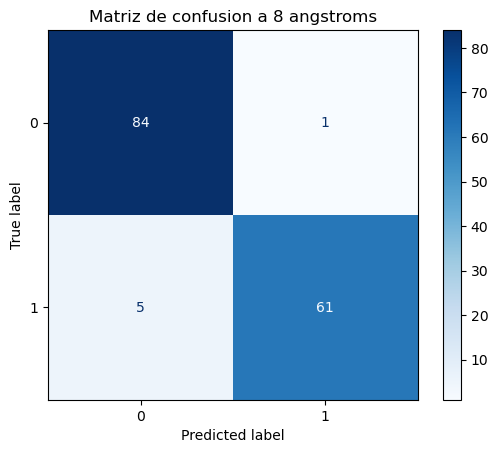

In [23]:
# Depiction de la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f"Matriz de confusion a {cutoff} angstroms")
plt.show()

Y se vuelven a mirar las feature importances para el modelo correspondiente:

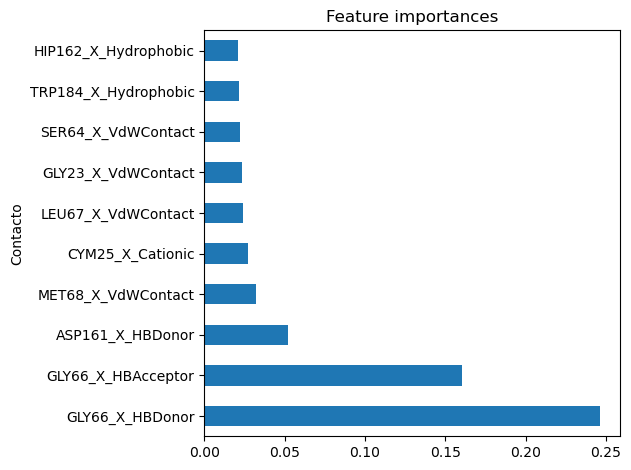

In [24]:
# Definición de los feature importances
importance = rf_cvgs.best_estimator_.feature_importances_
forest_importance = pd.Series(importance,index=rf_cvgs.feature_names_in_)

feature_numbers = 10
forest_importance_sorted = forest_importance.sort_values(ascending=False).head(feature_numbers)
fig, ax = plt.subplots()
forest_importance_sorted.plot.barh(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Contacto")
fig.tight_layout()

Cabe destacar que todo este trabajo se realizó de manera iterativa empleando valores de cutoff decrecientes: 999, 20, 15, 12, 10, 8, 5

| Cutoff | Precision | Recall | Accuracy | F1 training | f1 test
|----------|----------|----------| ----------| ----------| ----------|
| 999 Baseline RF  | 0.9219  | 0.8939  | 0.9205  | -  | 0.9077  |
| 999 A KFCV_RF  | 0.9677  | 0.9091  | 0.947  | 0.9054  | 0.9375  |
| 20 A KFCV_RF  | 0.9365  | 0.8939  | 0.9272  | 0.9104  | 0.9147  |
| 15 A KFCV_RF  | 0.9531  | 0.9242  | 0.947  |  0.9071  | 0.9385  |
| 12 A KFCV_RF  | 0.9375  | 0.9091  | 0.9338  | 0.9079  | 0.9231  |
| 10 A KFCV_RF  | 0.9552  | 0.9697  | 0.9669  | 0.9159  | 0.9624  |
| 8 A KFCV_RF  | 0.9839  | 0.9242  | 0.9603  | 0.9036  | 0.9531  |
| 5 A KFCV_RF  | 0.8444  | 0.5758  | 0.7682  | 0.6071  | 0.6847  |


De análisis de los valores hallados, pueden concluirse los siguientes aspectos:

- Que el procedimiento de K-fold cross validation mojora la performance del modelo respecto de la aproximación estándar de desarollo del modelo de Random Forest. Claramente existe una mejora en la generalización del modelo product de la secuencia y bagging de procedimientos de train_test_split. Aquí cabe destacar que se informan los resultados empleando una K=5. También se hicieron pruebas con K=10 (los resultados no se incluyen por razones de brevedad en el notebook), pero los resultados no mostraron mejora, aunque sí se incrementó el notablemente el tiempo de entrenamiento.

- Que existe un notable impacto del radio de cutoff en la performance del modelo. Se identifica que reducir el radio de consideración de las feature mejora la performance del modelo, lo cual se interpreta como que el dataset se hace menos difuso (sparse). Asimismo mejora la generalización del modelo. También disminuye el tiempo de entrenamiento al bajar el criterio de cutoff, dado que el número de features sobre los cuales entrenar también disminuye. Resulta importante mencionar que dichos beneficios en el desarrollo del modelo tienen un corte a partir de los 8 angstroms de radio, a partir del cual se observa que el modelo se deteriora significativamente. Ello seguramente se debe muy probablemente a que las features mas imporantes que determinan el poder discriminativo del modelo ya quedan afuera por debajo de 8 angstroms.

Como conclusión es necesario decidir si conviene cortar los features a 8 o 10 angstroms. Para decidirlo, resulta útil inspeccionar las matrices de confusión para ambos casos, recordando que la prioridad de la campañana de screening virtual de TCIs es tener la menor cantidad de falsos positivos posibles, ya que ello implica menores errores en las propuestas de trabajo sintético experimental

***Matriz de confusión a 10 angstroms***

![Contactos_principales_baselina](./images/matriz_confusion_10A.png)

***Matriz de confusión a 8 angstroms***

![Contactos_principales_baselina](./images/matriz_confusion_8A.png)

Se puede observar que a 8 angstroms se tienen menos falsos positivos, siendo además un modelo con menos features. Se selecciona este como modelo final para poner en producción. Resulta de interés observa la naturaleza del compuesto identificado como falso positivo: 

In [27]:
# Mostrar interacciones para las 3 features principales en los casos FALSOS POSITIVOS
results = strings_test.copy()
results['true_label'] = y_test
results['predicted_label'] = y_pred
false_positives = results[(results["true_label"] == 0) & (results["predicted_label"] == 1)]
interactions_list = ["GLY66_X_HBAcceptor", "GLY66_X_HBDonor", "ASP161_X_HBDonor"]
sub_poses_list = []
for index, row in false_positives.iterrows():
    sub_pose_name = row["sub_pose"]
    sub_poses_list.append(sub_pose_name)

subset = functions.show_subpose_interactions(filtered_df, interactions_list, sub_poses_list, true_label=0, predicted_label=1)
subset

/home/fredy/MisDocumentos/Varios/Codigo_Facilito_BootCamp_Machine_Learning_2025/notebook/custom_functions/functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subseted_df_subpose["True_label"] = true_label
/home/fredy/MisDocumentos/Varios/Codigo_Facilito_BootCamp_Machine_Learning_2025/notebook/custom_functions/functions.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subseted_df_subpose["Predicted_label"] = predicted_label


,assay_id,sub_pose,GLY66_X_HBAcceptor,GLY66_X_HBDonor,ASP161_X_HBDonor,True_label,Predicted_label
319,6,SBKALLGFHFRENE-UHFFFAOYSA-N_4,1,1,1,0,1


Puede verse que la única pose de unión detectada como falso positivo efectivamente estable contactos del tipo GLY66_X_HBAcceptor, GLY66_X_HBDonor y ASP161_X_HBDonor, los cuaĺes son farmacofóricos. Una inspección del su pose tridimensional muestra:

![Contactos_principales_baselina](./images/pose_falso_positivo.png)

Pueden verse que los contacto efectivamente están presentes. Poses de este tipo definitivamente requiren de inspección humana para ser detectadas, lo cual se interpreta con un trabajo acotado y posterior a la clasificación con el modelo de machine learning desarrollado.

# Conclusiones y puesta en producción del modelo

A partir de lo presentado, puede concluirse que fué posible desarrollar un modelo de Random Forest que clasifica de manera robusta y general las poses de unión a CZP de derivados del núcleo 1,2,3 triazol 1,4 disustituídos, significando como tal componente central en la campaña de screening de candidatos a síntesis experimental.

Hasta este punto se cuenta con el modelo guardado en un archivo .pkl, y para su puesta en producción es necesario avanzar en etapas de insertarlo en el workflow de funcionamiento de TidyScreen, tal como puede verse en la siguiente figura:


![Contactos_principales_baselina](./images/tidy_workflow.png)


Dicha puesta en producción excede a los objetivos del presente proyecto, pero al momento de escritura de este notebook se encuentra en proceso de avance. Como parte del trabajo sincronizado de la plataforma, se espera que el módulo ***ML Models*** que incluye en una base de datos SQL al archivo .pkl conteniendo el modelo desarrollado, sea capaz de clasificar poses de unión de manera encadenada al funcionamiento del módulo ***MolDock***. Cabe mencionar que el objetivo final de dicho funcionamiento sincronizado es el screening de librerías de varios cientos de miles de análogos de derivados del núcleo 1,2,3 triazol 1,4 disustituídos, las cuáles se han obtenido mediante procedimientos de síntesis virtual combinatoria.